In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Define File Path
complete = "ufc_complete.csv"

# # Colab URL
# complete = 'https://raw.githubusercontent.com/GregoryRash6/Project-3/master/ufc_complete.csv'

# Read CSV
data = pd.read_csv(complete)

In [3]:
# Set Target
target = data["Winner_Blue"]

# Set Target Names
target_names = ["Lost", "Won"]

In [4]:
# Drop Winner
data = data.drop("Winner_Blue", axis=1)

# Get Feature Names
feature_names = data.columns

In [5]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [6]:
# Create Random Forest
rf = RandomForestClassifier(n_estimators=400, 
                            random_state=42, 
                            max_depth=5, 
                            max_features = "auto", 
                            min_samples_split = 5, 
                            min_samples_leaf = 5)

# Fit Model
rf = rf.fit(X_train, y_train)

# Print Training Score
print(f"Training Score: {rf.score(X_train, y_train)}")

# Print Testing Score
print(f"Testing Score: {rf.score(X_test, y_test)}")

# Print Difference
print(f"Difference: {rf.score(X_train, y_train) - rf.score(X_test, y_test)}")

Training Score: 0.673469387755102
Testing Score: 0.6746698679471789
Difference: -0.0012004801920768582


In [7]:
# Sort & Show Important Features
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.09243516368987047, 'B_avg_SIG_STR_landed'),
 (0.08383101884815214, 'R_age'),
 (0.04899951358463147, 'R_avg_TD_pct'),
 (0.04571670953947903, 'R_total_rounds_fought'),
 (0.044946671036571816, 'R_avg_SIG_STR_pct'),
 (0.04490457252956329, 'R_avg_TD_landed'),
 (0.043135632652762636, 'R_losses'),
 (0.038571628342196754, 'R_avg_SUB_ATT'),
 (0.03841075032704804, 'R_win_by_Decision_Split'),
 (0.03289081336626577, 'R_avg_SIG_STR_landed'),
 (0.03198152476340823, 'B_avg_SIG_STR_pct'),
 (0.02931269766399313, 'B_age'),
 (0.02293908991920469, 'B_avg_TD_pct'),
 (0.021489533831861005, 'elevation (ft)'),
 (0.02124981521255558, 'B_avg_SUB_ATT'),
 (0.020882630586197794, 'B_avg_TD_landed'),
 (0.017616663772220775, 'B_total_rounds_fought'),
 (0.017497955072610937, 'R_wins'),
 (0.016989900255334766, 'B_Reach_cms'),
 (0.015616082900660385, 'R_Reach_cms'),
 (0.014202091893397887, 'R_longest_win_streak'),
 (0.01419899087818252, 'B_Height_cms'),
 (0.014173579149539596, 'B_Weight_lbs'),
 (0.013551549509068853

In [8]:
# Make Predictions
predictions = rf.predict(X_test)

# Print First 10 Predictions
print(f"First 10 Predictions:   {predictions[:10].tolist()}")

# Print First 10 Results
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [0, 0, 0, 0, 0, 1, 0, 0, 1, 0]
First 10 Actual labels: [1, 1, 1, 1, 0, 1, 0, 1, 0, 0]


In [9]:
# Create Dataframe
compare = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

# Show First 50 Comparisons
compare.head(50)

,Prediction,Actual
0,0,1
1,0,1
2,0,1
3,0,1
4,0,0
5,1,1
6,0,0
7,0,1
8,1,0
9,0,0


In [10]:
# Save Feature Importances
results = sorted(zip(rf.feature_importances_, feature_names), reverse=True)

# Set Empty String
values = []

# Set Empty String
names = []

# Save Names & Values
for x in range(len(results)):
    values.append(results[x][0])
    names.append(results[x][1])

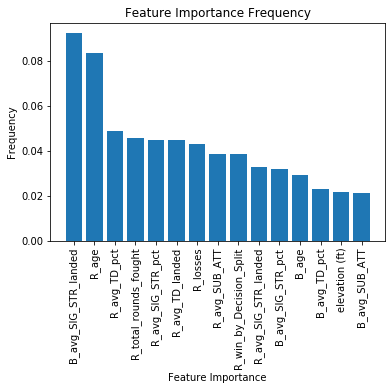

<Figure size 432x288 with 0 Axes>

In [11]:
# Plot New Figure
plt.figure()

# Bar Chart
plt.bar(names[0:15], values[0:15])

# Set XTicks
plt.xticks(names[0:15], rotation="vertical")

# Set Title
plt.title("Feature Importance Frequency")

# Set Y Label
plt.ylabel("Frequency")

# Set X Label
plt.xlabel("Feature Importance")

# Display Chart
plt.show()

# Tight Layout
plt.tight_layout()

In [12]:
# n_estimators = [500, 800, 1500, 2500, 5000]
# max_features = ["auto", "sqrt", "log2"]
# max_depth = [10, 20, 30, 40, 50]
# max_depth.append(None)
# min_samples_split = [2, 5, 10, 20]
# min_samples_leaf = [1, 2, 5, 10, 15]

# grid_params = {"n_estimators": n_estimators, 
#                "max_features": max_features, 
#                "max_depth": max_depth, 
#                "min_samples_split": min_samples_split, 
#                "min_samples_leaf": min_samples_leaf}

# from sklearn.model_selection import RandomizedSearchCV

# RFR = RandomForestRegressor(random_state=42)
# RFR_random = RandomizedSearchCV(estimator = RFR,
#                                param_distributions = grid_params,
#                                n_iter = 500,
#                                cv = 5,
#                                verbose = 2,
#                                random_state = 42,
#                                n_jobs = -1)
# # regres = values.reshape(1,-1) 
# RFR_random.fit(X_train, y_train)
# print(RFR_random.best_params_)
